# Project 3

In [2]:
from gensim.models import Word2Vec

In [1]:
# Load The Project Gutenberg eBook of Meditations, by Marcus Aurelius
import urllib
url = "https://www.gutenberg.org/files/2680/2680-0.txt"
file = urllib.request.urlopen(url)

text = []

for line in file:
    decoded_line = line.decode("utf-8")
    print(decoded_line)
    text.append(decoded_line)

﻿The Project Gutenberg eBook of Meditations, by Marcus Aurelius



This eBook is for the use of anyone anywhere in the United States and

most other parts of the world at no cost and with almost no restrictions

whatsoever. You may copy it, give it away or re-use it under the terms

of the Project Gutenberg License included with this eBook or online at

www.gutenberg.org. If you are not located in the United States, you

will have to check the laws of the country where you are located before

using this eBook.



Title: Meditations



Author: Marcus Aurelius



Translator: Meric Casaubon



Release Date: June, 2001 [eBook #2680]

[Most recently updated: March 8, 2021]



Language: English



Character set encoding: UTF-8



Produced by: J. Boulton and David Widger



*** START OF THE PROJECT GUTENBERG EBOOK MEDITATIONS ***









MEDITATIONS



By Marcus Aurelius









CONTENTS





     NOTES



     INTRODUCTION



     FIRST BOOK



     SECOND BOOK



     THIRD BOOK



     F

that doth though never so common, as a knife, a flower, or a tree?



XVII. If so be that the souls remain after death (say they that will not

believe it); how is the air from all eternity able to contain them? How

is the earth (say I) ever from that time able to Contain the bodies

of them that are buried? For as here the change and resolution of dead

bodies into another kind of subsistence (whatsoever it be;) makes place

for other dead bodies: so the souls after death transferred into the

air, after they have conversed there a while, are either by way of

transmutation, or transfusion, or conflagration, received again into

that original rational substance, from which all others do proceed:

and so give way to those souls, who before coupled and associated unto

bodies, now begin to subsist single. This, upon a supposition that the

souls after death do for a while subsist single, may be answered. And

here, (besides the number of bodies, so buried and contained by the

earth), 

bound thy thoughts, as one that had obtained his end; nor didst not

think that from the action itself thou hadst received a full reward of

the good that thou hadst done. For what wouldst thou have more? Unto him

that is a man, thou hast done a good turn: doth not that suffice thee?

What thy nature required, that hast thou done. Must thou be rewarded for

it? As if either the eye for that it seeth, or the feet that they go,

should require satisfaction. For as these being by nature appointed for

such an use, can challenge no more, than that they may work according

to their natural constitution: so man being born to do good unto others

whensoever he doth a real good unto any by helping them out of error; or

though but in middle things, as in matter of wealth, life, preferment,

and the like, doth help to further their desires he doth that for which

he was made, and therefore can require no more.









THE TENTH BOOK





I. O my soul, the time I trust will be, when thou shalt

In [3]:
## Train the genisim word2vec model with our own custom corpus
model = Word2Vec(text, min_count=1,workers=3, window =3, sg = 1)

c:\users\kasia\pyproj\nlp-for-business\my_env\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


In [4]:
model.corpus_total_words

424830

In [5]:
!pip install corextopic
!pip install networkx

You should consider upgrading via the 'c:\users\kasia\pyproj\nlp-for-business\my_env\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\kasia\pyproj\nlp-for-business\my_env\scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt

import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [7]:
# Transform 20 newsgroup data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(text)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(7231, 6235)

In [8]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

c:\users\kasia\pyproj\nlp-for-business\my_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# remove all intgers
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(7231, 6108)

In [10]:
# Train the CorEx topic model with 50 topics
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words);

In [11]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=1, n_words=10)

[('thou', 0.41906243978874114, 1.0),
 ('shalt', 0.04534783416419467, 1.0),
 ('art', 0.041891922415933425, 1.0),
 ('hast', 0.03664375407213293, 1.0),
 ('dost', 0.023580138515553416, 1.0),
 ('thyself', 0.020774114909520722, 1.0),
 ('doest', 0.020596371785388656, 1.0),
 ('mayest', 0.01771723686440173, 1.0),
 ('wilt', 0.01663511625799722, 1.0),
 ('thy', 0.010765947348722134, 1.0)]

In [12]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: gutenberg, project, tm, foundation, terms, license, states, literary, united, trademark
1: thou, shalt, art, hast, dost, thyself, doest, mayest, wilt, thy
2: aurelius, marcus, antoninus, verus, emperor, pius, material, son, donations, language
3: works, electronic, work, copyright, associated, distributing, copies, charges, company, permission
4: fronto, famous, school, athens, century, cornelius, 4th, cæsar, cynic, maximus
5: ad, caes, stoic, fancies, ii, imaginations, religious, grandfather, gentle, epictetus
6: wild, beasts, satisfied, knew, person, spent, beloved, sun, courage, flocks
7: comedy, portion, easy, new, farewell, intended, wait, slow, lot, constantly
8: eyes, people, child, date, later, home, masters, tyrant, returned, youth
9: places, delightful, shame, desert, fig, secret, speech, anyways, businesses, theatre
10: old, pride, sensitive, theory, age, friendship, proud, capable, foot, plain
11: public, state, left, prince, suspicion, moderation, applicable, readily, e

In [13]:
topic_model.get_topics(topic=5, n_words=10, print_words=False)

[(106, 0.01977410357711883, 1.0),
 (716, 0.013540966766861532, 1.0),
 (5107, 0.011188355678202928, 1.0),
 (2103, 0.008057963559842861, 1.0),
 (2721, 0.006261445454800548, 1.0),
 (2727, 0.00600791022364022, 1.0),
 (4438, 0.005670684750813264, 1.0),
 (2440, 0.005247591517704819, 1.0),
 (2380, 0.0045511422693318105, 1.0),
 (1903, 0.004435951203971999, 1.0)]

In [14]:
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words

[21  2  7 ...  4 31 15]
(6108,)


In [15]:
# Print a single topic from CorEx topic model
topic_model.get_top_docs(topic=0, n_docs=10, sort_by='log_prob')

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


[(2323, 0.0),
 (7042, 0.0),
 (6489, 0.0),
 (7131, 0.0),
 (6905, 0.0),
 (7129, 0.0),
 (7128, 0.0),
 (7127, 0.0),
 (6491, 0.0),
 (7046, 0.0)]

In [16]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(7231, 50)


In [17]:
print(topic_model.labels.shape) # n_docs x k_topics

(7231, 50)


In [18]:
topic_model.tc

2.4143987491137184

In [19]:
topic_model.tcs.shape # k_topics

(50,)

In [20]:
print(np.sum(topic_model.tcs))
print(topic_model.tc)

2.4143987491137184
2.4143987491137184


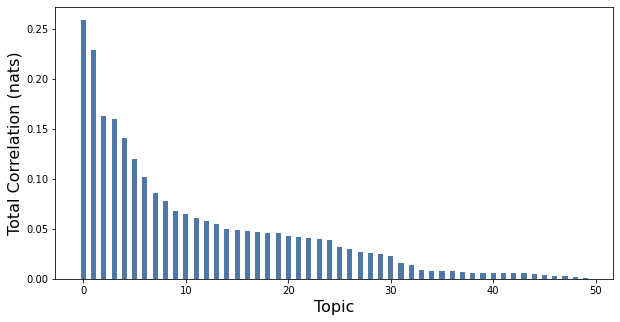

In [21]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [22]:
topic_model.log_z.shape # n_docs x k_topics

(7231, 50)

In [23]:
print(np.mean(topic_model.log_z, axis=0))
print(topic_model.tcs)

[0.25894452 0.22916375 0.16242762 0.1601766  0.14060316 0.11980763
 0.10151699 0.08569868 0.0780588  0.06761796 0.06511176 0.06075546
 0.05770557 0.05499858 0.05006445 0.04871951 0.04809265 0.04647755
 0.04583209 0.04555409 0.04318141 0.04196575 0.04077579 0.04018723
 0.0389967  0.03208462 0.02967111 0.02633058 0.02608494 0.02437717
 0.02239636 0.01581932 0.01426603 0.00882315 0.00813512 0.00749154
 0.00740929 0.00709393 0.00620786 0.00588853 0.0058047  0.00562189
 0.0055973  0.00542496 0.00466903 0.00408387 0.00292049 0.00262796
 0.00194906 0.00118566]
[0.25894452 0.22916375 0.16242762 0.1601766  0.14060316 0.11980763
 0.10151699 0.08569868 0.0780588  0.06761796 0.06511176 0.06075546
 0.05770557 0.05499858 0.05006445 0.04871951 0.04809265 0.04647755
 0.04583209 0.04555409 0.04318141 0.04196575 0.04077579 0.04018723
 0.0389967  0.03208462 0.02967111 0.02633058 0.02608494 0.02437717
 0.02239636 0.01581932 0.01426603 0.00882315 0.00813512 0.00749154
 0.00740929 0.00709393 0.00620786 0.00

In [24]:
# Train a second layer to the topic model
tm_layer2 = ct.Corex(n_hidden=10)
tm_layer2.fit(topic_model.labels);

# Train a third layer to the topic model
tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels);

In [25]:
vt.vis_hierarchy([topic_model, tm_layer2, tm_layer3], column_label=words, max_edges=200, prefix='topic-model-example')

weight threshold is 0.000000 for graph with max of 200.000000 edges 


In [30]:
# Anchor one word to the first topic
anchor_words = ['theory']

In [31]:
# Anchor the word 'theory' to the first topic
anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);

In [32]:
# word anchored to the first topic
topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=0))
print('0: ' + ', '.join(topic_words))

0: gutenberg, project, tm, theory, works, foundation, electronic, terms, copyright, license


In [33]:
# Anchor 'theory' and 'friendship' to first topic, ...
anchor_words = [['theory', 'friendship'], ['place', 'good'], ['politics', 'government'], ['love', 'hope']]

anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);

In [34]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))

0: gutenberg, project, tm, theory, friendship, works, electronic, foundation, terms, copyright
1: good, place, bad, wild, beasts, simple, frag, gross, harlot, roarer
2: government, ripe, politics, writer, spent, athens, books, ship, orators, translation
3: love, hope, company, cassius, tax, reflect, alexander, moderation, muses, pompeius
